In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("economic_index.csv")

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
y = df['index_price']

In [7]:
X = df[['interest_rate','unemployment_rate']]

Text(0, 0.5, 'Index Price')

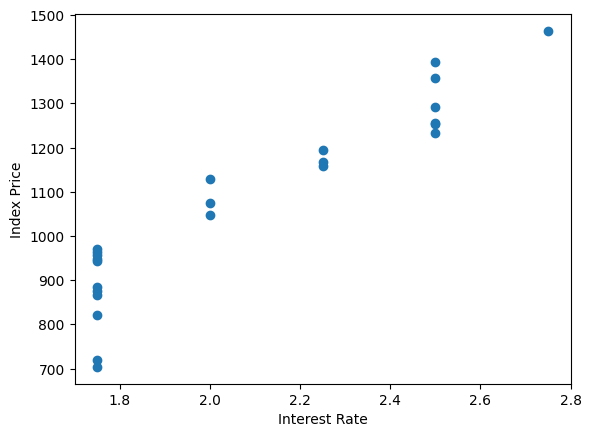

In [ ]:
plt.scatter(X[['interest_rate']],y)
plt.xlabel("Interest Rate")
plt.ylabel("Index Price")


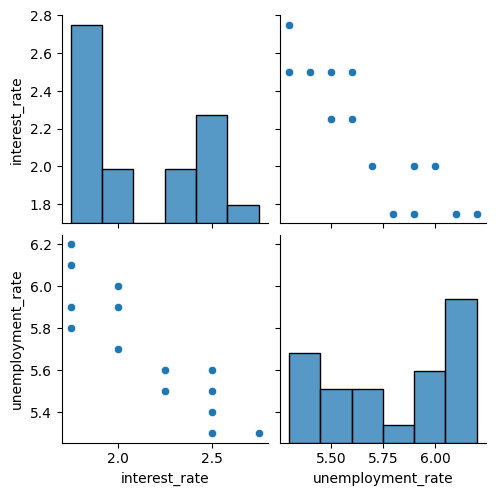

In [12]:
import seaborn as sns
sns.pairplot(X)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.25)

<Axes: xlabel='interest_rate', ylabel='index_price'>

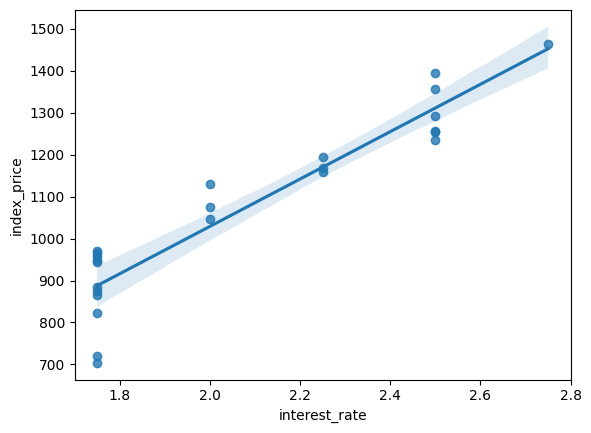

In [62]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

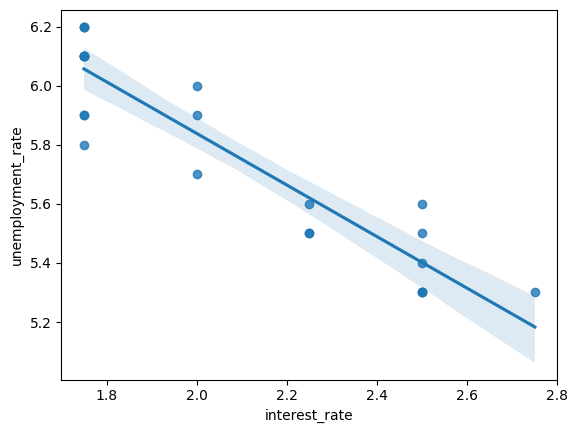

In [63]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
lr.coef_

array([  88.27275507, -116.25716066])

In [53]:
lr.intercept_

1053.4444444444443

In [54]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(lr,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [55]:
y_pred = lr.predict(X_test)

In [56]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test,y_pred)
mae= mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [65]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.7591371539010257


In [72]:
residuals = Y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


/tmp/ipykernel_18013/3762910054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

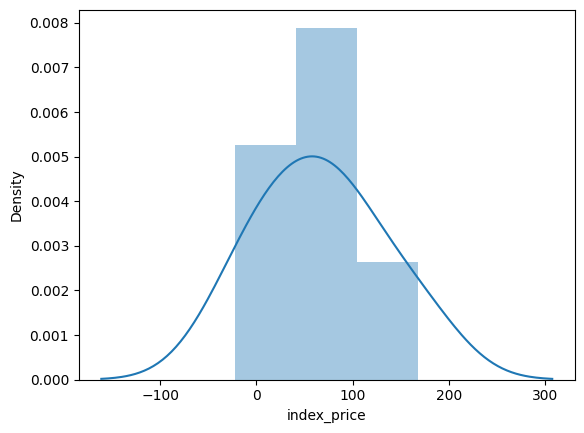

In [76]:
sns.distplot(residuals,kde=True)

In [77]:
import statsmodels.api as sm

In [78]:
model = sm.OLS(Y_train,X_train).fit()

In [79]:
model.summary()

/home/sarvesh/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                       0.754
Time:                        01:22:24   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""